In [33]:
import os
import warnings
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Polygon
from matplotlib.patches import Ellipse
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

IMAGES_PATH = '.'
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure generative_1


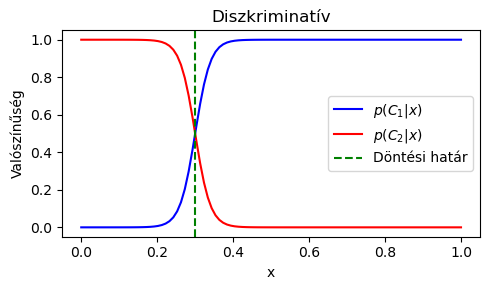

In [2]:
# Define the x range
x = np.linspace(0, 1, 100)
# Define the posterior probabilities for class 1 and class 2
p_c1_given_x = 1 / (1 + np.exp(-50 * (x - 0.3)))
p_c2_given_x = 1 - p_c1_given_x

# Create the plot
plt.figure(figsize=(5, 3))
plt.plot(x, p_c1_given_x, label=r'$p(C_1|x)$', color='blue')
plt.plot(x, p_c2_given_x, label=r'$p(C_2|x)$', color='red')
# Add a vertical line for the decision boundary
decision_boundary = 0.3
plt.axvline(x=decision_boundary, color='g', ls='--', label='Döntési határ')
# Labeling the plot
plt.xlabel('x')
plt.ylabel('Valószínűség')
plt.title('Diszkriminatív')
plt.legend()
# Save the plot to a file
save_fig('generative_1')
# Show the plot
plt.show()


Saving figure generative_2


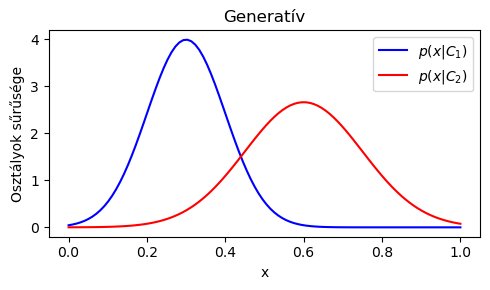

In [3]:
# Adjusting the parameters of the Gaussian distributions to make them different from each other
# Gaussian function for class densities
def gaussian(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std)**2))


# New parameters for the Gaussian distributions
mean1, std1 = 0.3, 0.1  # No change for C1 to keep as a reference
mean2, std2 = 0.6, 0.15  # Changed mean and standard deviation for C2
# Recalculate the class densities with the new parameters
p_x_given_c1 = gaussian(x, mean1, std1)
p_x_given_c2 = gaussian(x, mean2, std2)

# Create the plot with the updated distributions
plt.figure(figsize=(5, 3))
plt.plot(x, p_x_given_c1, label=r'$p(x|C_1)$', color='blue')
plt.plot(x, p_x_given_c2, label=r'$p(x|C_2)$', color='red')
# Labeling the plot
plt.xlabel('x')
plt.ylabel('Osztályok sűrűsége')
plt.title('Generatív')
plt.legend()
# Save the updated plot to a file
save_fig('generative_2')
# Show the plot
plt.show()

Model accuracy: 0.96
Saving figure generative_3


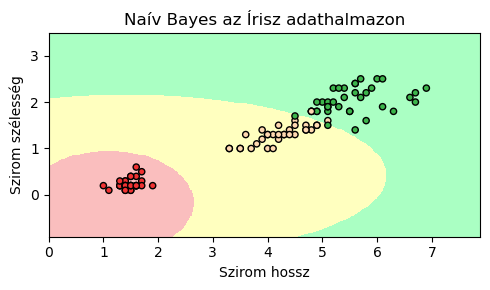

In [4]:


# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Use only petal length and petal width
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# Predict class using data and kNN classifier
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 3))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#fabebe', '#ffffbf', '#aaffc3']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#f03232', '#ffd8b1', '#3cb44b']), edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naív Bayes az Írisz adathalmazon")
plt.xlabel('Szirom hossz')
plt.ylabel('Szirom szélesség')
save_fig('generative_3')
plt.show()

Saving figure generative_4


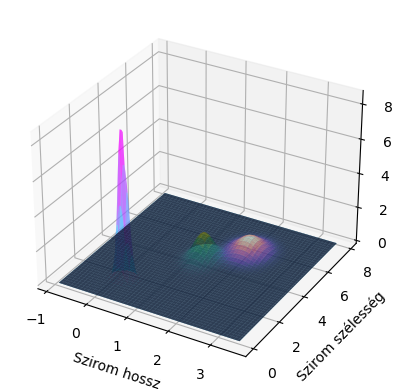

In [5]:
# We'll now plot the petal width on the x-axis, petal length on the y-axis, and the probability density on the z-axis
# to visualize the bell curves of the Gaussian distributions in 3D space.
from scipy.stats import norm
from matplotlib import cm

# Calculate probability densities for petal length and petal width for each class
petal_length_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
petal_width_range = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)

# Creating a meshgrid for the petal length and width
Petal_Width, Petal_Length = np.meshgrid(petal_width_range, petal_length_range)

# Calculate the probability density for each class based on petal width and length
prob_density_length_class_0 = norm.pdf(Petal_Length, loc=gnb.theta_[0,0], scale=np.sqrt(gnb.var_[0,0]))
prob_density_length_class_1 = norm.pdf(Petal_Length, loc=gnb.theta_[1,0], scale=np.sqrt(gnb.var_[1,0]))
prob_density_length_class_2 = norm.pdf(Petal_Length, loc=gnb.theta_[2,0], scale=np.sqrt(gnb.var_[2,0]))

prob_density_width_class_0 = norm.pdf(Petal_Width, loc=gnb.theta_[0,1], scale=np.sqrt(gnb.var_[0,1]))
prob_density_width_class_1 = norm.pdf(Petal_Width, loc=gnb.theta_[1,1], scale=np.sqrt(gnb.var_[1,1]))
prob_density_width_class_2 = norm.pdf(Petal_Width, loc=gnb.theta_[2,1], scale=np.sqrt(gnb.var_[2,1]))

# Probability density for each class is the product of the densities of length and width
prob_density_class_0 = prob_density_length_class_0 * prob_density_width_class_0
prob_density_class_1 = prob_density_length_class_1 * prob_density_width_class_1
prob_density_class_2 = prob_density_length_class_2 * prob_density_width_class_2

# Create a 3D plot
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot the probability density surfaces
alpha_lvl = .5
ax.plot_surface(Petal_Width, Petal_Length, prob_density_class_0, cmap='cool', alpha=alpha_lvl, label='Class 0')
ax.plot_surface(Petal_Width, Petal_Length, prob_density_class_1, cmap='viridis', alpha=alpha_lvl, label='Class 1')
ax.plot_surface(Petal_Width, Petal_Length, prob_density_class_2, cmap='magma', alpha=alpha_lvl, label='Class 2')

# Labeling
ax.set_xlabel('Szirom hossz')
ax.set_ylabel('Szirom szélesség')
ax.set_zlabel('Valószínűség sűrűség')
plt.tight_layout()
save_fig('generative_4')
plt.show()


In [6]:
import numpy as np
from scipy.stats import multivariate_normal

# Function to plot the Gaussian distribution and its contour representation
def plot_gaussian(mean, cov, subplot_title, fig_name = None):
    # Create a grid of (x, y) coordinates
    x, y = np.mgrid[-5:5:.1, -5:5:.1]
    pos = np.dstack((x, y))
    
    # Create a multivariate normal distribution with the given mean and covariance
    rv = multivariate_normal(mean, cov)
    
    # Calculate the z values for the Gaussian function on the grid
    z = rv.pdf(pos)
    
    # Create the plots
    fig = plt.figure(figsize=(11, 5))
    
    # 3D plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel('Valószínűség sűrűség')
    
    # 2D contour plot
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.contourf(x, y, z, cmap='viridis')
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')
    
    # Show plot
    plt.tight_layout()
    if fig_name is not None:
        save_fig(fig_name, tight_layout=False)
    plt.show()

Saving figure generative_5


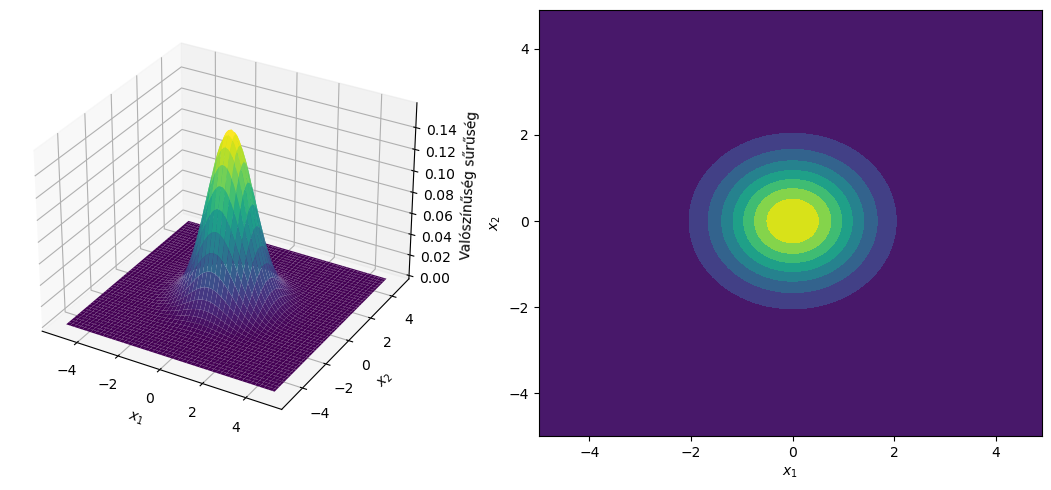

In [7]:
# Mean and covariance matrix for the first plot
mean = [0, 0]
cov = [[1, 0], [0, 1]]

# Plotting the first Gaussian distribution
plot_gaussian(mean, cov, 'μ=[0,0], Σ=Identitás', 'generative_5')


Saving figure generative_6


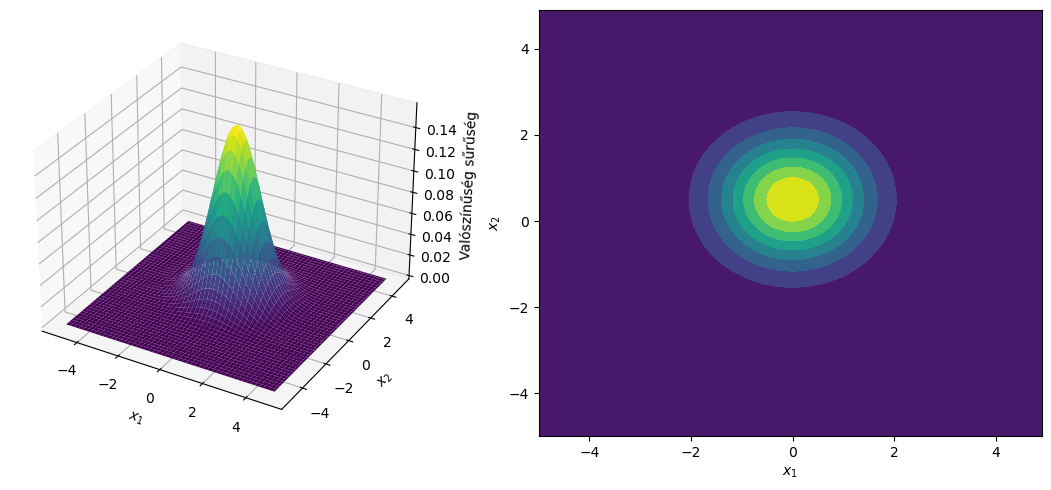

In [8]:
# Mean and covariance matrix for the first plot
mean = [0, 0.5]
cov = [[1, 0], [0, 1]]

# Plotting the first Gaussian distribution
plot_gaussian(mean, cov, '', 'generative_6')

Saving figure generative_7


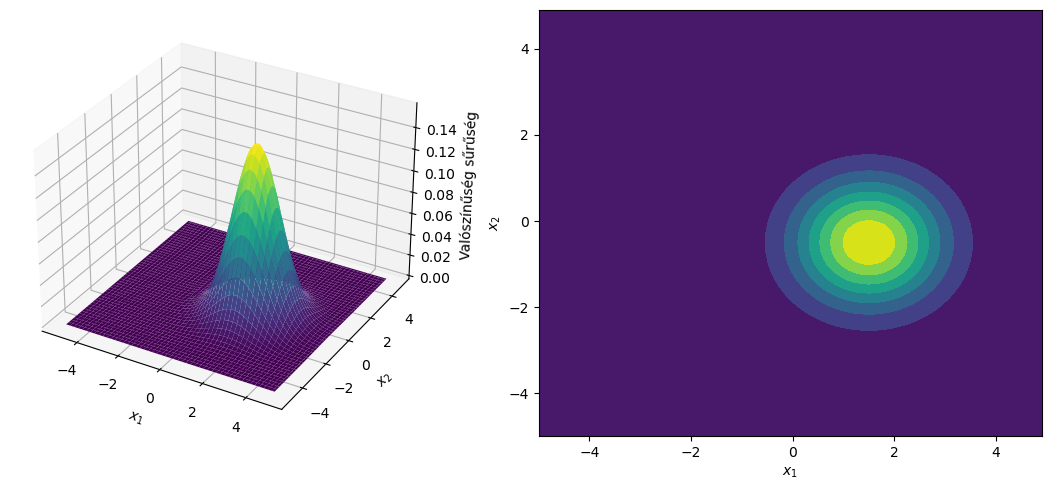

In [9]:
# Mean and covariance matrix for the first plot
mean = [1.5, -.5]
cov = [[1, 0], [0, 1]]

# Plotting the first Gaussian distribution
plot_gaussian(mean, cov, '', 'generative_7')

Saving figure generative_8


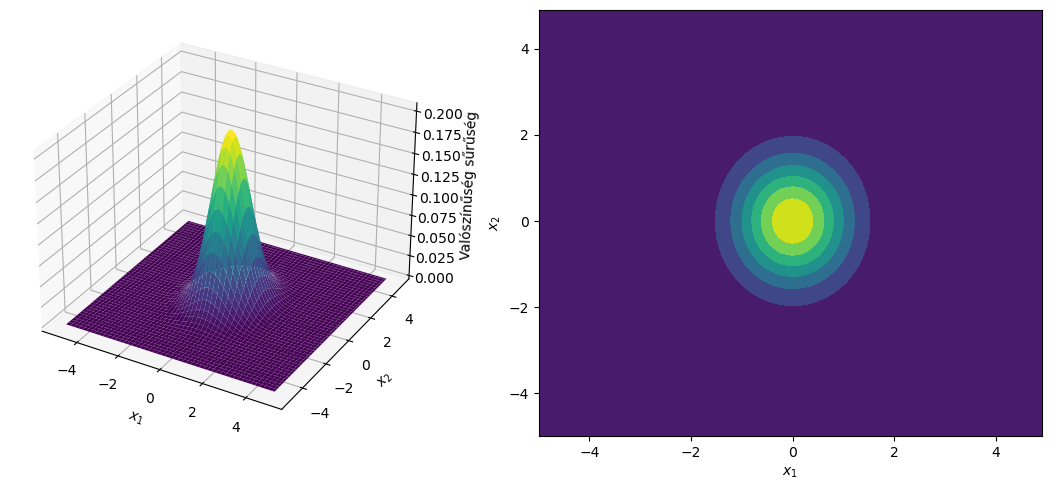

In [10]:
# Mean and covariance matrix for the first plot
mean = [0, 0]
cov = [[.6, 0], [0, 1]]

# Plotting the first Gaussian distribution
plot_gaussian(mean, cov, 'μ=[0,0], Σ=Identitás', 'generative_8')

Saving figure generative_9


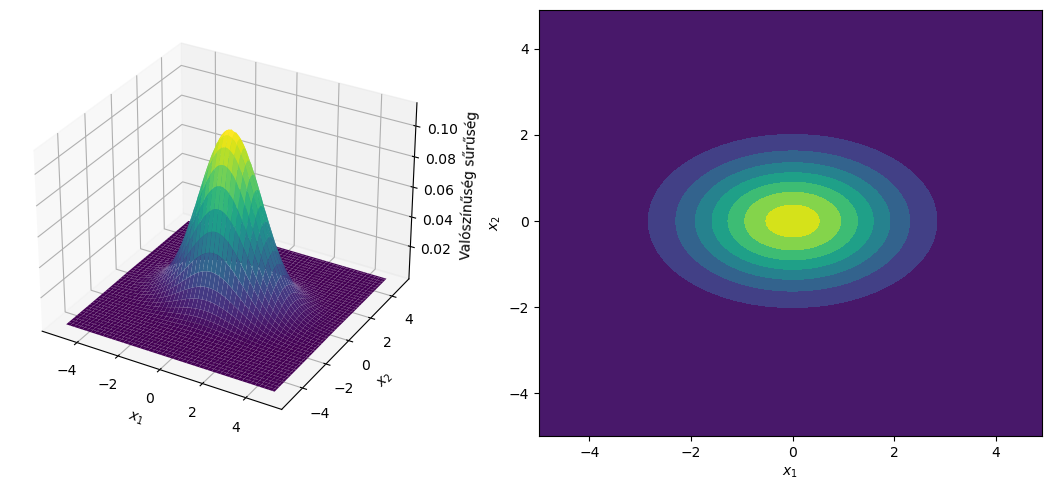

In [11]:
# Mean and covariance matrix for the first plot
mean = [0, 0]
cov = [[2, 0], [0, 1]]

# Plotting the first Gaussian distribution
plot_gaussian(mean, cov, '', 'generative_9')

Saving figure generative_10


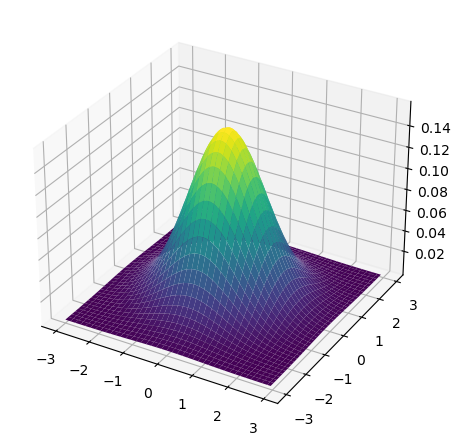

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix for a 2D Gaussian distribution
mean = np.array([0, 0])
covariance = np.array([[1, 0], [0, 1]])
# Create a grid of points
x, y = np.mgrid[-3:3:.05, -3:3:.05]
pos = np.dstack((x, y))
# Create the Gaussian distribution
rv = multivariate_normal(mean, covariance)
# Calculate the probability density for the grid of points
z = rv.pdf(pos)

# Plot the surface
fig = plt.figure(figsize=(5, 4.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
# Set labels and title
save_fig('generative_10')
# Show the plot
plt.show()

Saving figure generative_11


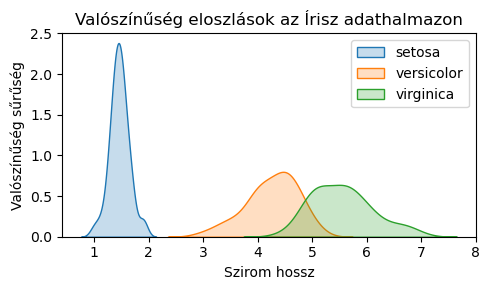

In [13]:
import seaborn as sns

# Creating a 2D plot with petal length on the x-axis and probability density on the y-axis
plt.figure(figsize=(5, 3))

# Using seaborn's kdeplot for kernel density estimation
sns.kdeplot(data=iris.data[iris.target == 0, 2], label=iris.target_names[0], shade=True)
sns.kdeplot(data=iris.data[iris.target == 1, 2], label=iris.target_names[1], shade=True)
sns.kdeplot(data=iris.data[iris.target == 2, 2], label=iris.target_names[2], shade=True)

plt.title('Valószínűség eloszlások az Írisz adathalmazon')
plt.xlabel('Szirom hossz')
plt.ylabel('Valószínűség sűrűség')
plt.legend()
save_fig('generative_11')
plt.show()


Saving figure generative_12


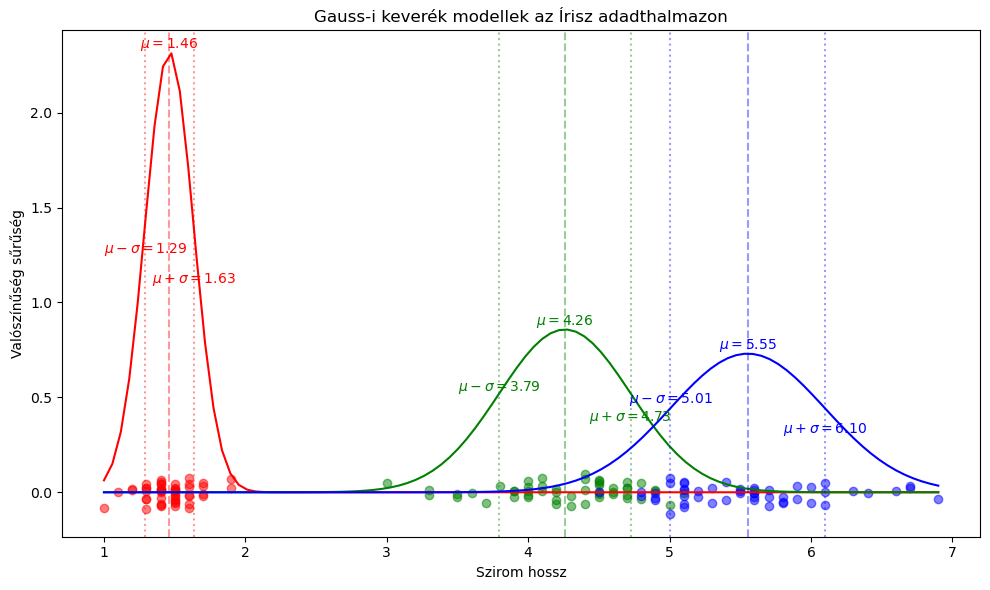

In [14]:
# Correcting the mistake by resetting the variables after the state reset
# and including visualization of the mean (mu) and standard deviation (sigma) for each Gaussian distribution.

# Load the Iris dataset again
iris = datasets.load_iris()
X = iris.data
y = iris.target

# We will focus on the petal length (3rd feature) for this example
petal_length = X[:, 2]

# Calculate the Gaussian distribution for petal length for each class
means = [petal_length[y == i].mean() for i in range(3)]
stds = [petal_length[y == i].std() for i in range(3)]

# Calculate the Gaussian curves
x = np.linspace(petal_length.min(), petal_length.max(), 100)
curves = [norm.pdf(x, means[i], stds[i]) for i in range(3)]

# Plot the Gaussian curves
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, (curve, color) in enumerate(zip(curves, colors)):
    plt.plot(x, curve, color=color)

    # Scatter the data points on the x-axis
    data = petal_length[y == i]
    jitter = np.random.normal(0, 0.04, size=data.shape)
    plt.scatter(data, jitter, color=color, alpha=0.5)

    # Draw vertical lines for the mean and standard deviation
    plt.axvline(means[i], color=color, linestyle='dashed', alpha=.4)
    plt.axvline(means[i] + stds[i], color=color, linestyle='dotted', alpha=.4)
    plt.axvline(means[i] - stds[i], color=color, linestyle='dotted', alpha=.4)

    # Add text annotations for mean and standard deviation
    plt.text(means[i], max(curves[i]), f'$\mu={means[i]:.2f}$', ha='center', va='bottom', color=color)
    plt.text(means[i] + stds[i], max(curves[i])/2-.08, f'$\mu+\sigma={means[i]+stds[i]:.2f}$', ha='center', va='bottom', color=color)
    plt.text(means[i] - stds[i], max(curves[i])/2+.08, f'$\mu-\sigma={means[i]-stds[i]:.2f}$', ha='center', va='bottom', color=color)

# Add labels and title
plt.xlabel('Szirom hossz')
plt.ylabel('Valószínűség sűrűség')
plt.title('Gauss-i keverék modellek az Írisz adadthalmazon')
save_fig('generative_12')
plt.show()


In [15]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


1
Saving figure generative_13


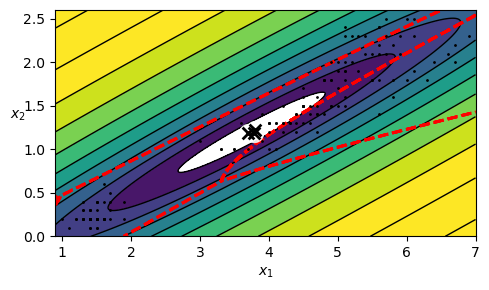

5
Saving figure generative_14


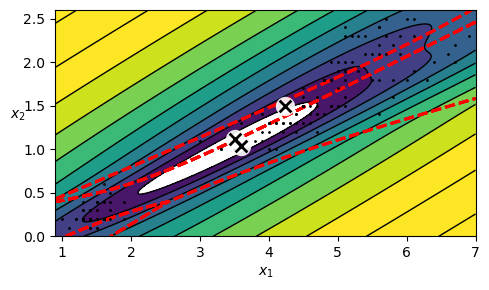

9
Saving figure generative_15


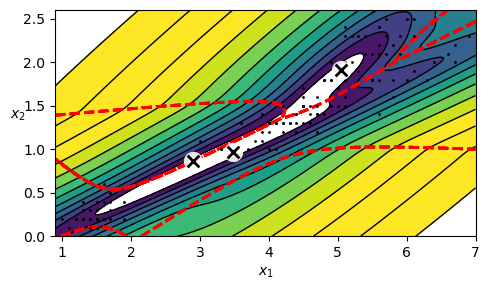

13
Saving figure generative_16


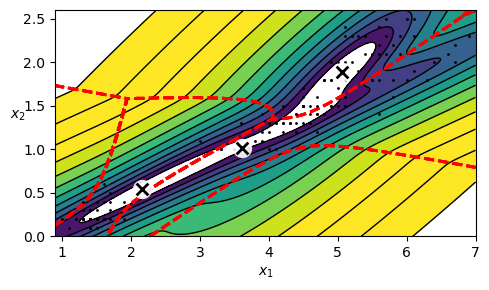

17
Saving figure generative_17


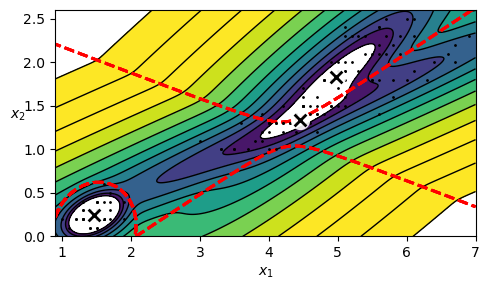

In [16]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the last two features.

# Fit a Gaussian mixture with EM using five iterations
n_iter = 5
counter = 1
n_increase = 4
start_fig_id = 13

for i in range(n_iter):
    print(counter)
    gmm = GaussianMixture(
        n_components=3, 
        random_state=100, 
        max_iter=counter, 
        init_params='random'
    )

    gmm.fit(X)
 
    plt.figure(figsize=(5, 3))
    plot_gaussian_mixture(gmm, X)
    save_fig(f'generative_{start_fig_id + i}')
    plt.show()

    counter += n_increase
    del gmm


In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure generative_18


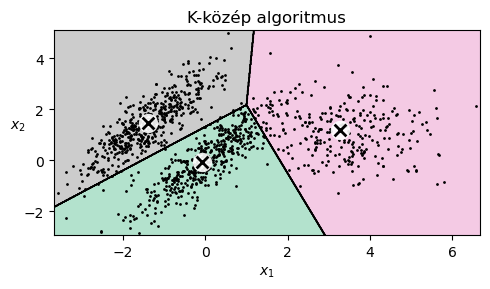

In [18]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_good.fit(X)

plt.figure(figsize=(5, 3))
plot_decision_boundaries(kmeans_good, X)
plt.title('K-közép algoritmus')
save_fig('generative_18')
plt.show()

Saving figure generative_19


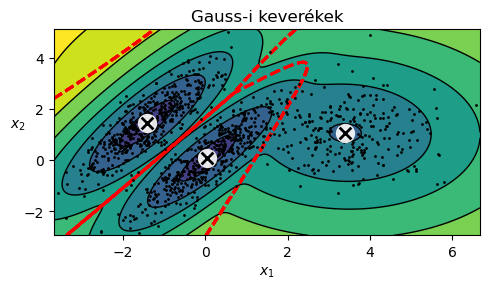

In [19]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)

gm.fit(X)

plt.figure(figsize=(5, 3))
plot_gaussian_mixture(gm, X)
plt.title('Gauss-i keverékek')
save_fig("generative_19")
plt.show()

Saving figure generative_20


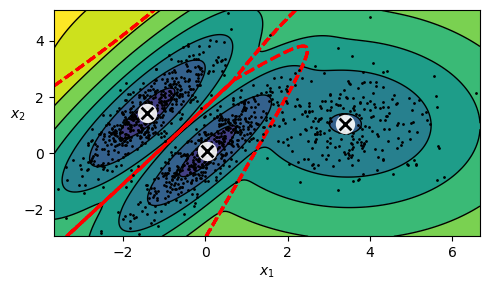

Saving figure generative_21


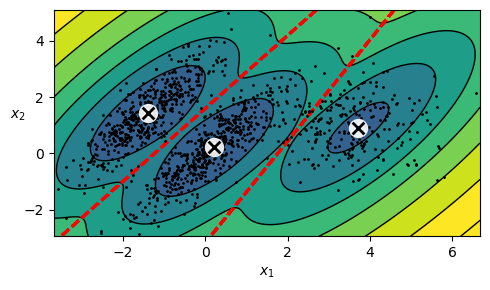

Saving figure generative_22


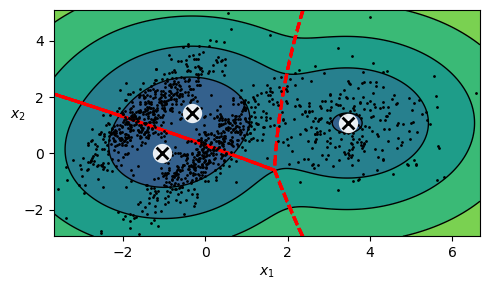

Saving figure generative_23


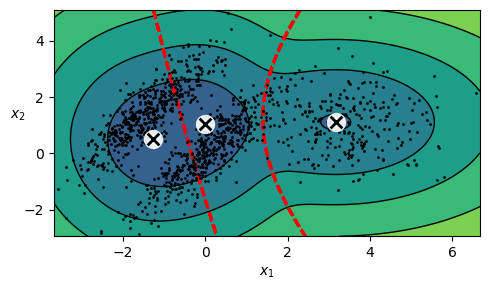

In [20]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

plt.figure(figsize=(5, 3))
plot_gaussian_mixture(gm_full, X)
save_fig("generative_20")
plt.show()

plt.figure(figsize=(5, 3))
plot_gaussian_mixture(gm_tied, X)
save_fig("generative_21")
plt.show()

plt.figure(figsize=(5, 3))
plot_gaussian_mixture(gm_spherical, X)
save_fig("generative_22")
plt.show()

plt.figure(figsize=(5, 3))
plot_gaussian_mixture(gm_diag, X)
save_fig("generative_23")
plt.show()

Saving figure generative_24


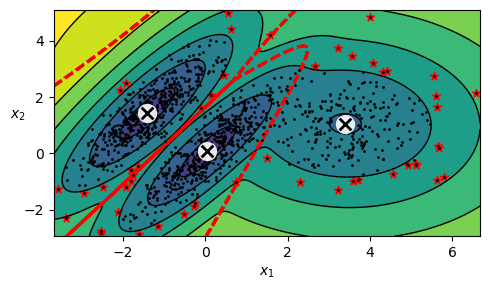

In [29]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

plt.figure(figsize=(5, 3))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("generative_24")
plt.show()

In [22]:
from sklearn.datasets import make_moons
from sklearn.mixture import BayesianGaussianMixture

Saving figure generative_25


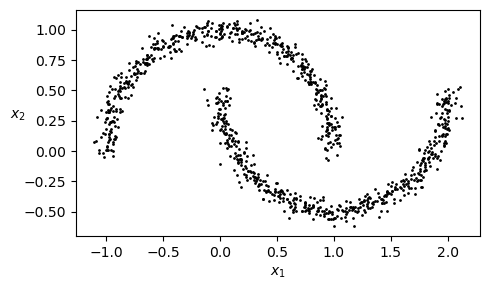

Saving figure generative_26


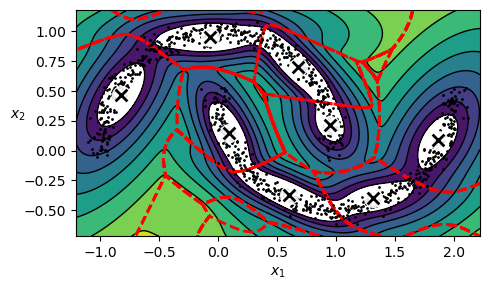

Saving figure generative_27


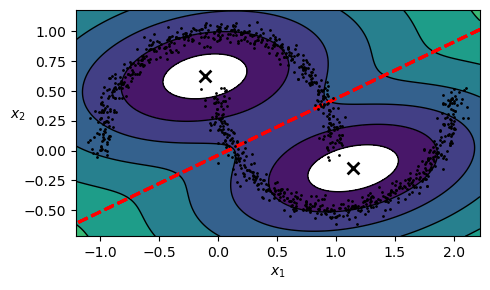

In [28]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.figure(figsize=(5, 3))
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
save_fig('generative_25')
plt.show()

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(5, 3))
plot_gaussian_mixture(bgm, X_moons, show_ylabels=True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
save_fig('generative_26')
plt.show()

bgm = BayesianGaussianMixture(n_components=2, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(5, 3))
plot_gaussian_mixture(bgm, X_moons, show_ylabels=True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
save_fig('generative_27')
plt.show()

Saving figure generative_28
Saving figure generative_29
Saving figure generative_30
Saving figure generative_31


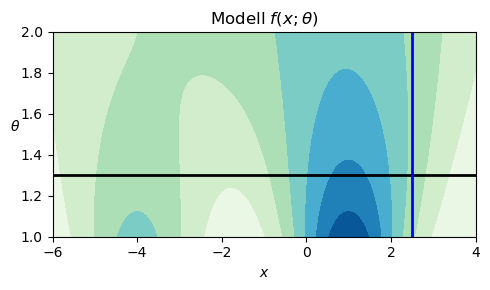

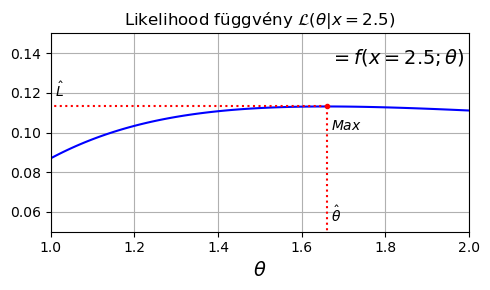

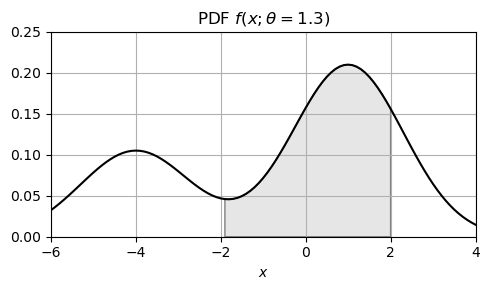

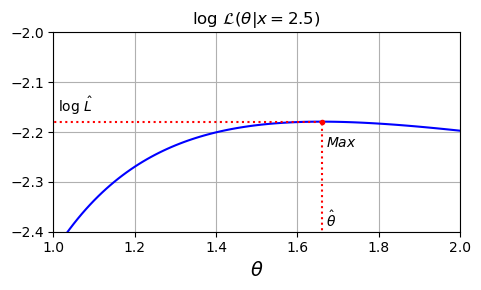

In [36]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])


x_idx = 85
s_idx = 30

plt.figure(figsize=(5, 3))
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", rotation=0)
plt.title(r"Modell $f(x; \theta)$")
save_fig('generative_28')

plt.figure(figsize=(5, 3))
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$")
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$")
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$")
plt.title(r"Likelihood függvény $\mathcal{L}(\theta|x=2.5)$")
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
save_fig('generative_29')

plt.figure(figsize=(5, 3))
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.grid(True)
plt.xlabel(r"$x$")
plt.title(r"PDF $f(x; \theta=1.3)$")
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)
save_fig('generative_30')

plt.figure(figsize=(5, 3))
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$")
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$")
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$")
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$")
plt.grid(True)
save_fig('generative_31')
plt.show()


Saving figure generative_32


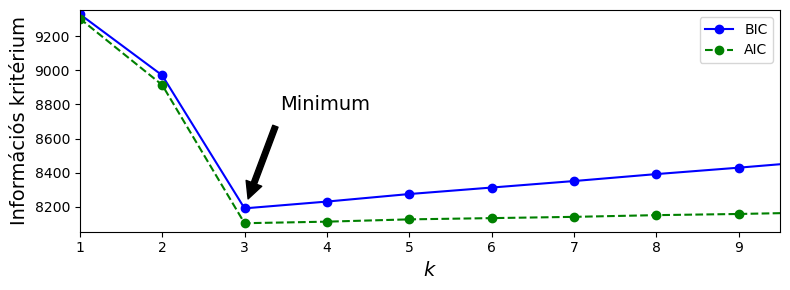

In [39]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Információs kritérium", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("generative_32")
plt.show()